In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [4]:
# load dataset
df = sm.datasets.fair.load_pandas().data

In [5]:
df.shape #(rows,columns)

(6366, 9)

In [6]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [7]:
df['affairs'].unique()

array([1.11111100e-01, 3.23076920e+00, 1.39999960e+00, 7.27272700e-01,
       4.66666600e+00, 8.52173500e-01, 1.82608600e+00, 4.79999920e+00,
       1.33333300e+00, 3.26666450e+00, 2.04166600e+00, 4.84848400e-01,
       2.00000000e+00, 1.36111070e+00, 7.83999630e+00, 2.54545400e+00,
       5.32608700e-01, 6.22222200e-01, 5.83333300e-01, 1.66666600e-01,
       6.15384600e-01, 1.18787770e+00, 1.11999989e+01, 2.17777630e+00,
       7.00000000e+00, 5.21739100e-01, 2.12121200e-01, 4.00000000e-01,
       3.19999980e+00, 1.50769140e+00, 4.89999960e+00, 4.34783000e-02,
       7.69231000e-02, 2.92173860e+00, 2.68799896e+01, 6.06061000e-02,
       8.88888800e-01, 1.52173900e-01, 9.42307700e-01, 3.88888800e-01,
       5.16923050e+00, 1.69696900e+00, 2.71515080e+00, 1.11999998e+01,
       7.46666720e+00, 4.97777750e+00, 2.69230700e-01, 7.42424200e-01,
       4.17391300e+00, 3.44615360e+00, 9.23076900e-01, 3.11111070e+00,
       3.47826100e-01, 2.55999908e+01, 2.15384580e+00, 1.94782540e+00,
      

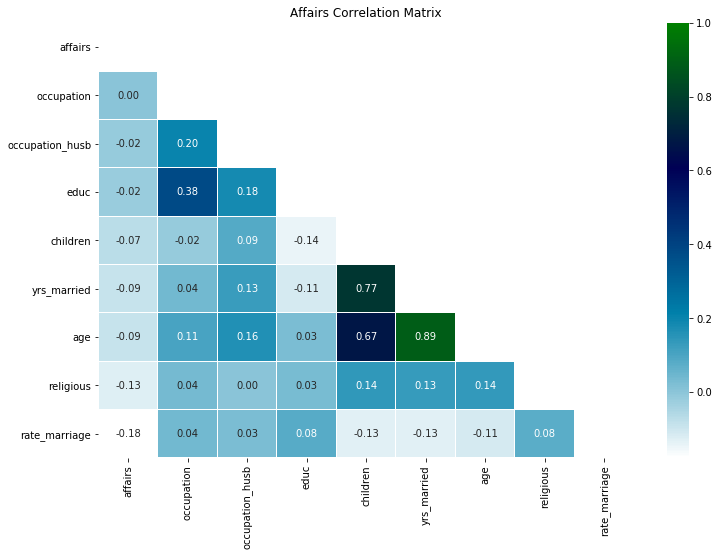

In [8]:
corrmat = df.corr()
sort = corrmat.nlargest(10,'affairs')['affairs'].index #Total no. of column (8) is plotted since correlation matrix as first cut is required for all data
cmx = np.corrcoef(df[sort].values.T)

mask = np.zeros_like(cmx, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 8))
plt.title('Affairs Correlation Matrix',fontsize=12)
sns.heatmap(cmx,mask=mask, cbar=True,linewidths=0.05,vmax=1.0,annot=True, fmt=".2f",cmap="ocean_r",yticklabels=sort.values, xticklabels=sort.values)
plt.show()

In [9]:
df['affair'] = (df.affairs > 0).astype(int)

In [10]:
df=df.drop(['affairs'], axis=1)
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affair'],
      dtype='object')

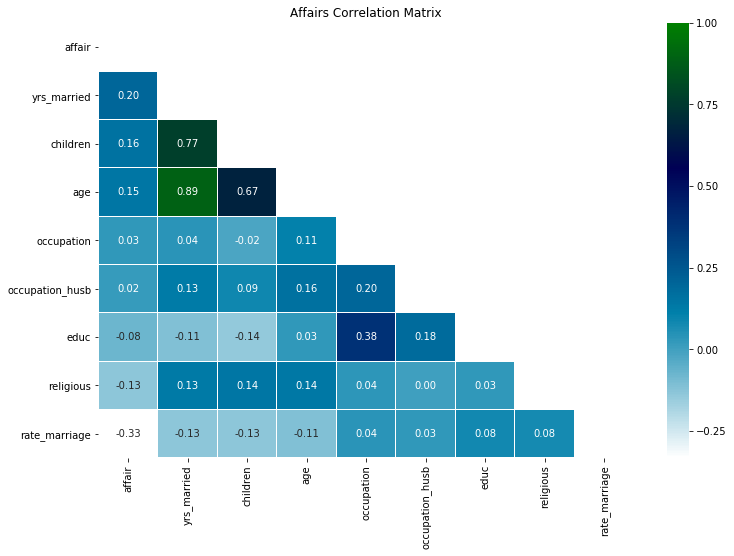

In [11]:
corrmat = df.corr()
sort = corrmat.nlargest(11,'affair')['affair'].index #Total no. of column (8) is plotted since correlation matrix as first cut is required for all data
cmx = np.corrcoef(df[sort].values.T)

mask = np.zeros_like(cmx, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 8))
plt.title('Affairs Correlation Matrix',fontsize=12)
sns.heatmap(cmx,mask=mask, cbar=True,linewidths=0.05,vmax=1.0,annot=True, fmt=".2f",cmap="ocean_r",yticklabels=sort.values, xticklabels=sort.values)
plt.show()

['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb']
rate_marriage


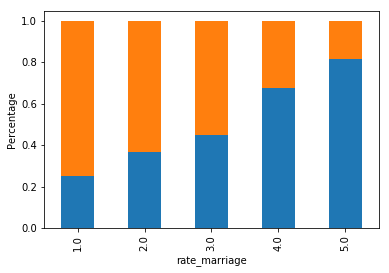

age


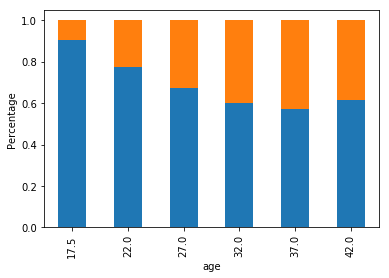

yrs_married


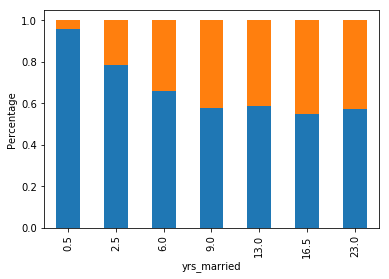

children


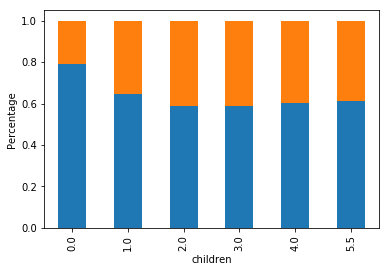

religious


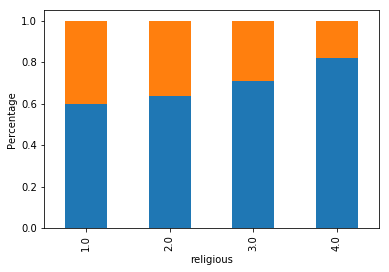

educ


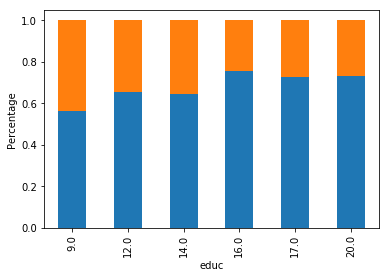

occupation


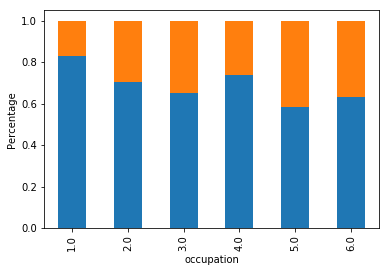

occupation_husb


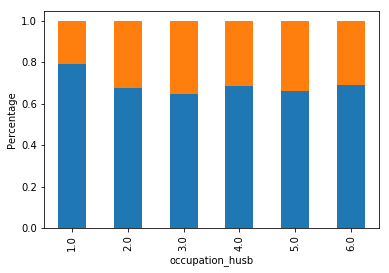

In [12]:
col_names = list(df.columns)
col_names.remove('affair')
print(col_names)

for i in col_names:
    print(i)
    affair_ = pd.crosstab(df[i], df.affair.astype(bool))
    ax=affair_.div(affair_.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    ax.legend_.remove()
    plt.xlabel(i)
    plt.ylabel('Percentage')
    plt.show()

In [13]:
df['rate_marriage_YN'] = df['rate_marriage'].apply(lambda x: 1 if x > 1 else 0)
df['age_YN'] = df['age'].apply(lambda x: 1 if x > 17.5 else 0)
df['yrs_married_YN'] = df['yrs_married'].apply(lambda x: 1 if x > 1 else 0)
df['children_YN'] = df['children'].apply(lambda x: 1 if x > 0 else 0)
df['religious_YN'] = df['religious'].apply(lambda x: 1 if x > 1 else 0)
df['educ_YN'] = df['educ'].apply(lambda x: 1 if x > 9 else 0)
df['occupation_YN'] = df['occupation'].apply(lambda x: 1 if x > 1 else 0)
df['occupation_husb_YN'] = df['occupation_husb'].apply(lambda x: 1 if x > 1 else 0)

In [14]:
categorical_features = ['rate_marriage_YN', 'age_YN', 'yrs_married_YN', 'children_YN','religious_YN', 'educ_YN', 'occupation_YN', 'occupation_husb_YN']
for i in categorical_features:
    dummies = pd.get_dummies(df[i], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(i))
    df.drop(i, axis=1, inplace=True)
    df = df.join(dummies)

In [ ]:

#Interaction Features

In [15]:
df['rate_marriage_age'] = (df['rate_marriage']+df['age'])/2
df['rate_marriage_yrs_married'] = (df['rate_marriage']+df['yrs_married'])/2
df['rate_marriage_children'] = (df['rate_marriage']+df['children'])/2
df['rate_marriage_religious'] = (df['rate_marriage']+df['religious'])/2
df['rate_marriage_educ'] = (df['rate_marriage']+df['educ'])/2
df['rate_marriage_occupation'] = (df['rate_marriage']+df['occupation'])/2
df['rate_marriage_occupation_husb'] = (df['rate_marriage']+df['occupation_husb'])/2
df['age_yrs_married'] = (df['age']+df['yrs_married'])/2
df['age_children'] = (df['age']+df['children'])/2
df['age_religious'] = (df['age']+df['religious'])/2
df['age_educ'] = (df['age']+df['educ'])/2
df['age_occupation'] = (df['age']+df['occupation'])/2
df['age_occupation_husb'] = (df['age']+df['occupation_husb'])/2
df['yrs_married_children'] = (df['yrs_married']+df['children'])/2
df['yrs_married_religious'] = (df['yrs_married']+df['religious'])/2
df['yrs_married_educ'] = (df['yrs_married']+df['educ'])/2
df['yrs_married_occupation'] = (df['yrs_married']+df['occupation'])/2
df['yrs_married_occupation_husb'] = (df['yrs_married']+df['occupation_husb'])/2
df['children_religious'] = (df['children']+df['religious'])/2
df['children_educ'] = (df['children']+df['educ'])/2
df['children_occupation'] = (df['children']+df['occupation'])/2
df['children_occupation_husb'] = (df['children']+df['occupation_husb'])/2
df['religious_educ'] = (df['religious']+df['educ'])/2
df['religious_occupation'] = (df['religious']+df['occupation'])/2
df['religious_occupation_husb'] = (df['religious']+df['occupation_husb'])/2
df['educ_occupation'] = (df['educ']+df['occupation'])/2
df['educ_occupation_husb'] = (df['educ']+df['occupation_husb'])/2
df['occupation_occupation_husb'] = (df['occupation']+df['occupation_husb'])/2
df.shape

(6366, 53)

In [ ]:
# Logistic Regression

In [16]:
from sklearn import metrics
from scipy import linalg
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df['intercept'] = 1.0
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affair', 'rate_marriage_YN#0',
       'rate_marriage_YN#1', 'age_YN#0', 'age_YN#1', 'yrs_married_YN#0',
       'yrs_married_YN#1', 'children_YN#0', 'children_YN#1', 'religious_YN#0',
       'religious_YN#1', 'educ_YN#0', 'educ_YN#1', 'occupation_YN#0',
       'occupation_YN#1', 'occupation_husb_YN#0', 'occupation_husb_YN#1',
       'rate_marriage_age', 'rate_marriage_yrs_married',
       'rate_marriage_children', 'rate_marriage_religious',
       'rate_marriage_educ', 'rate_marriage_occupation',
       'rate_marriage_occupation_husb', 'age_yrs_married', 'age_children',
       'age_religious', 'age_educ', 'age_occupation', 'age_occupation_husb',
       'yrs_married_children', 'yrs_married_religious', 'yrs_married_educ',
       'yrs_married_occupation', 'yrs_married_occupation_husb',
       'children_religious', 'children_educ', 'children_occupation',
       'children_o

In [18]:
X = df.drop(['affair'], axis=1)
Y = df['affair']
Y.shape

(6366,)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3,random_state=0)
model = LogisticRegression()
model.fit(X_train, Y_train)
model.score(X_train, Y_train)

C:\Users\Chandan_J\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7271095152603232

In [28]:
predicted = model.predict(X_test)
predicted

array([1, 0, 0, ..., 0, 0, 0])

In [29]:
probs = model.predict_proba(X_test)
probs

array([[0.34281767, 0.65718233],
       [0.92503318, 0.07496682],
       [0.68673167, 0.31326833],
       ...,
       [0.5421582 , 0.4578418 ],
       [0.79372869, 0.20627131],
       [0.7255713 , 0.2744287 ]])

In [30]:
print(metrics.accuracy_score(Y_test, predicted)) # McR from test data
print(metrics.roc_auc_score(Y_test, probs[:, 1]))

0.7356020942408377
0.75421691926248


# # Model Evaluation Using Cross - Validation

In [31]:
scores = cross_val_score(LogisticRegression(), X_train, Y_train, 
                         scoring='accuracy', cv=10)
scores, scores.mean()

C:\Users\Chandan_J\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chandan_J\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chandan_J\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chandan_J\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chandan_J\AppData\Local\Continuum\anaconda3\lib\site-pa

(array([0.76008969, 0.7264574 , 0.72869955, 0.70627803, 0.70627803,
        0.73542601, 0.7505618 , 0.68314607, 0.72134831, 0.72359551]),
 0.7241880384944828)